# Benchmarks for Simple Mat2 Multiply

Now we can do some data analysis on the times and see what happens

In [6]:
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt

%matplotlib inline

df=pd.read_csv('Bench.csv')#DataFrame(data=timings)
df.describe(percentiles=[.25, .5, .75, 0.9, 0.99, 0.999])


,AVX2,Unroll,SIMD,Operator,Prefetch,Normal
count,1024.000000,1024.000000,1024.000000,1024.00000,1024.000000,0.0
mean,49.669922,50.723633,50.627930,60.62207,86.111328,NaN
std,194.480661,160.167492,159.013077,435.27179,1101.302750,NaN
min,41.000000,43.000000,43.000000,43.00000,41.000000,NaN
25%,42.000000,44.000000,44.000000,44.00000,42.000000,NaN
50%,43.000000,44.000000,44.000000,44.00000,43.000000,NaN
75%,43.000000,45.000000,44.250000,45.00000,43.000000,NaN
90%,47.000000,57.000000,57.000000,57.00000,47.000000,NaN
99%,54.000000,58.000000,58.000000,79.00000,54.000000,NaN
99.9%,84.540000,63.931000,62.885000,91.83900,9896.321000,NaN


Text(0.0, 0.5, 'Number of Samples')

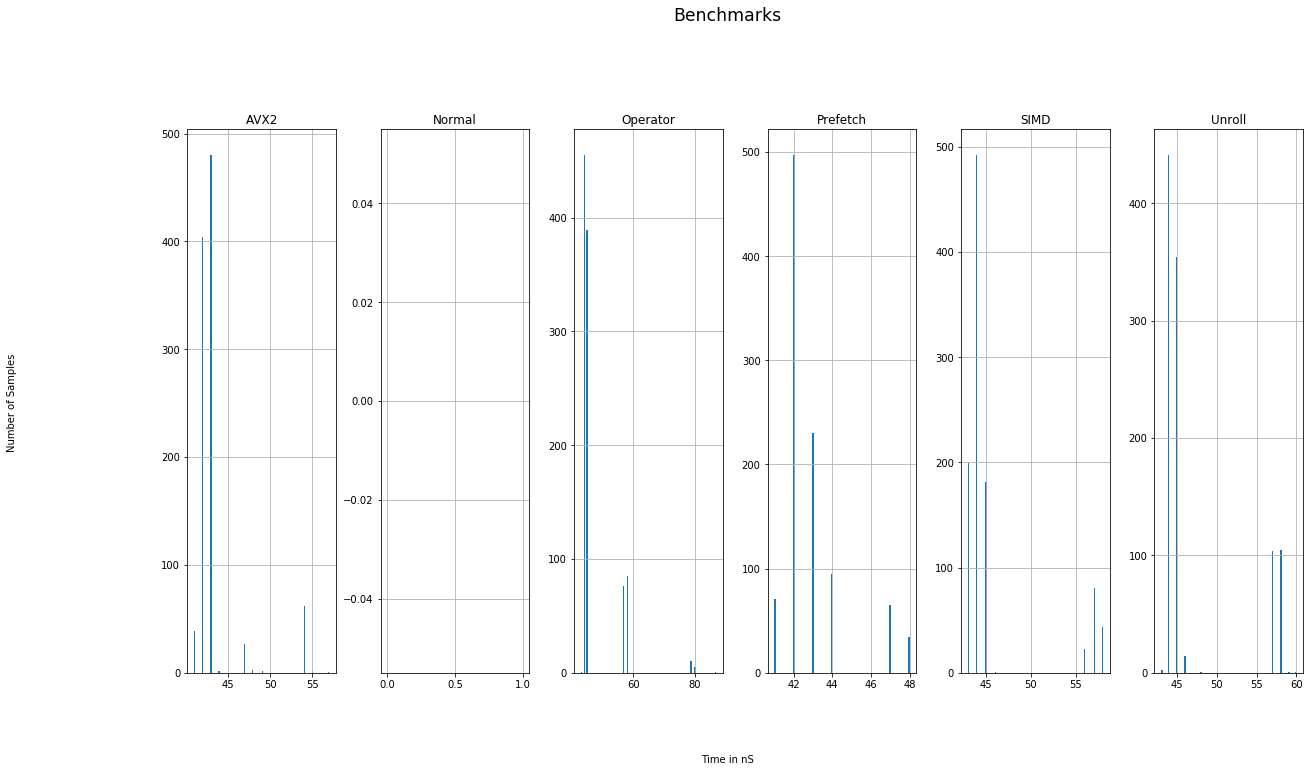

In [4]:
S = df
# keep only the ones that are within +3 to -3 standard deviations  
S=  S[~((S-S.mean()).abs() > 3*S.std())]

ndf = pd.DataFrame(data=S)
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=6, sharex=False, sharey=False,
                        figsize=(20, 10))


ndf.hist(grid=True,  bins=100,ax=axes )
plt.suptitle('Benchmarks', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.0, 'Time in nS', ha='center')
fig.text(0.0, 0.5, 'Number of Samples', va='center', rotation='vertical')
